# Analysis of crimes in Mexico during 2017 with Machine Learning techniques (Cluster Analysis): Comparison Elbow Method and Silhouette Method


_[Camacho-Perez Enrique](https://www.linkedin.com/in/ekamacho/), [Arroyo-Velázquez Isaac](https://www.linkedin.com/in/isaac-arroyo/)_

## Looking at the big picture

Crime issues always have been a delicate topic of great interest in Mexico. Some people believe there is a relationship between the number and the type of crime in the country's region. On this basis, the following work analyzes the data from the National Survey of Victimization and Perception of Public Security ( _ENVIPE_ ) 2018, which aim to estimate the number of crimes committed during 2017 in order to be compared to the **Peace Index Mexico (IPM) 2018**$^{1}$ 

## Data Acquisition

The data to be used are part of the National Survey of Victimization and Perception of Public Security ( _ENVIPE_ ) 2018$^{2}$, also we add the data from the number of homicides in each of the states$^{3}$.

All this data is reflected and group in a csv file named **CrimesMX2017** and has the following content.

* **ENTITY_CODE** : ID Number.
* **STATE** : State's name.
* **ID** : Official name's abbreviation.
* **HOMICIDES*** : The act of one human killing another.
* **CAR_THEFT*** : Total or partial theft of vehicle.
* **EXTORTION*** : Intimidation to perform an act to the detriment of your patrimony.
* **STREET_TRANSPORT_THEFT*** : Robbery/Theft or assault on the street or public transportation.
* **HOME_THEFT*** : Home theft.
* **FRAUD*** : Delivery of money for a product or service that was not received as agreed.
* **POPULATION** : Total number of inhabitants in the entity$^{4}$.
* **URBAN_PP** : Percentage of urban population$^{4}$.

_* Crime prevalence rate by state per hundred thousand inhabitants_

## Exploratory Data Analysis

### Import relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#GENERAL PLOT SETTINGS

#style sheet
plt.style.use('seaborn-paper')

#background in plots
c_background = '#FFFFFF'

#color for the XYZ planes for the 3d plots
rgba_planes = (231/255, 231/255, 231/255)


%matplotlib inline

In [2]:
#import the csv as a Data Frame
df = pd.read_csv('data/CrimesMX2017.csv', encoding='ISO-8859-1')
df.head(10)

,ENTITY_CODE,STATE,ID,HOMICIDES,CAR_THEFT,EXTORTION,STREET_TRANSPORT_THEFT,HOME_THEFT,FRAUD,POPULATION,URBAN_PP
0,1,AGUASCALIENTES,AS,83,17547,5188,4973,7823,3677,1321453,0.808277
1,2,BAJACALIFORNIA,BC,2144,17349,4965,4977,11665,4953,3584605,0.922662
2,3,BAJACALIFORNIASUR,BS,740,9803,3394,1522,7931,3559,809833,0.860283
3,4,CAMPECHE,CC,76,6459,3128,4104,6522,3625,935047,0.745742
4,5,COAHUILADEZARAGOZA,CL,273,6204,3534,3083,4415,4645,3029740,0.899927
5,6,COLIMA,CM,848,6594,5333,2430,6156,3193,747801,0.887692
6,7,CHIAPAS,CS,593,2391,2937,4199,4696,2067,5382083,0.487281
7,8,CHIHUAHUA,CH,2221,8261,5282,3603,5306,3628,3782018,0.848209
8,9,CIUDADDEMÉXICO,DF,1315,15917,6359,19325,4442,6618,8811266,0.995368
9,10,DURANGO,DG,197,6117,4448,2401,3051,3094,1799320,0.688725


### General observations

This section will provide an overview of the data, the central statistics and their distributions

In [3]:
#number of columns and rows 
df.shape

(32, 11)

In [4]:
#name of the columns
df.columns.values

array(['ENTITY_CODE', 'STATE', 'ID', 'HOMICIDES', 'CAR_THEFT',
       'EXTORTION', 'STREET_TRANSPORT_THEFT', 'HOME_THEFT', 'FRAUD',
       'POPULATION', 'URBAN_PP'], dtype=object)

In [5]:
#type of data we have
df.dtypes

ENTITY_CODE                 int64
STATE                      object
ID                         object
HOMICIDES                   int64
CAR_THEFT                   int64
EXTORTION                   int64
STREET_TRANSPORT_THEFT      int64
HOME_THEFT                  int64
FRAUD                       int64
POPULATION                  int64
URBAN_PP                  float64
dtype: object

A statistical summary of the data is shown below.

In [6]:
#relevant stats ordered in descending order (by the mean)
df.describe().transpose().iloc[1:-2].sort_values(by = 'mean', ascending = False)

,count,mean,std,min,25%,50%,75%,max
CAR_THEFT,32.0,8371.59375,4043.664235,2391.0,6006.75,7125.5,10131.25,17547.0
STREET_TRANSPORT_THEFT,32.0,5811.34375,4663.878357,1522.0,3056.00,4339.0,6398.25,23061.0
EXTORTION,32.0,5607.59375,2615.813373,2300.0,3403.00,5076.5,7119.25,12459.0
HOME_THEFT,32.0,5519.84375,1879.005796,3051.0,4186.50,5345.5,6441.00,11665.0
FRAUD,32.0,3833.78125,1312.221798,2032.0,2916.25,3607.0,4899.75,6983.0
HOMICIDES,32.0,974.18750,804.847428,50.0,407.75,715.5,1561.75,3046.0


It can be seen that the highest averages of number of crimes per hundred thousand inhabitants are:
1. **CAR_THEFT**
2. **STREET_TRANSPORT_THEFT**
3. **EXTORTION**

### Data distribution

As part of the analysis, the distribution of the variables will be shown through histograms.

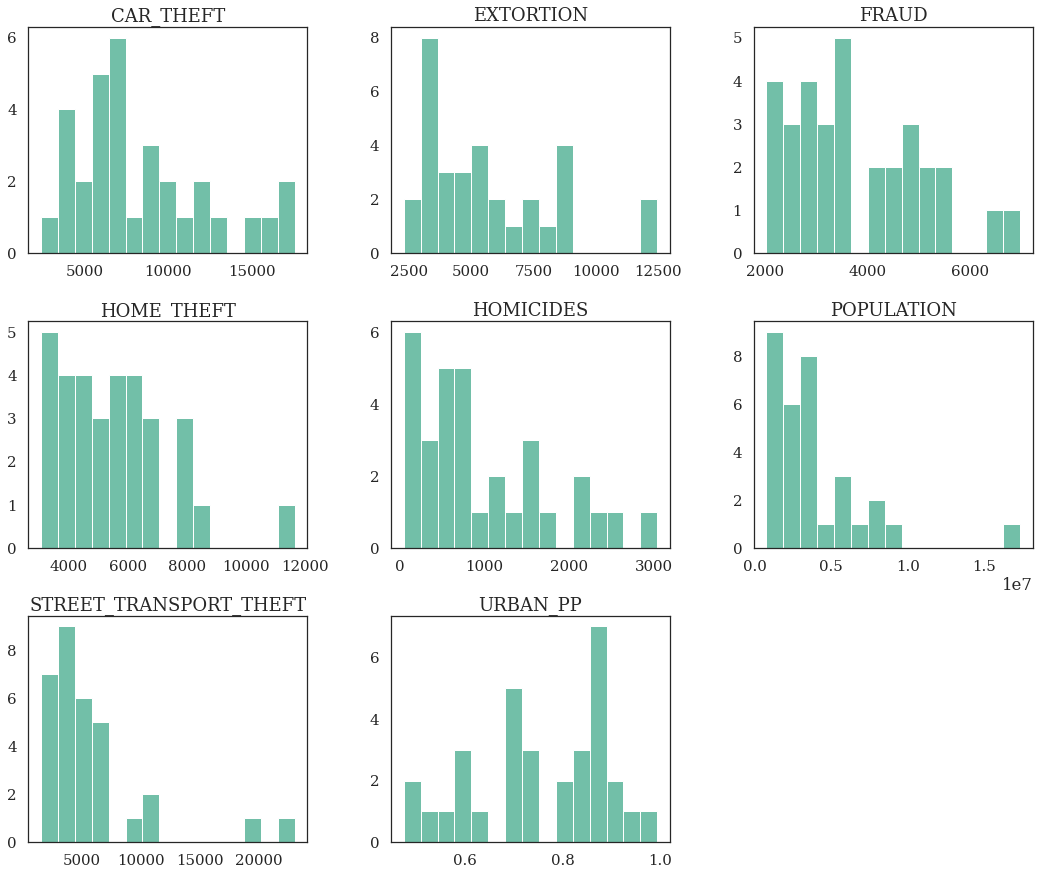

In [7]:
#seaborn font size and style of plot
sns.set( font_scale = 1.5, style = 'white' )

#matplotlib font type
plt.rc('font', family='serif')

df.iloc[:,3:].hist( figsize=(18,15), bins=15,
                   xlabelsize = 15, ylabelsize = 15,
                   color = '#72BFA8',
                   grid = False)
plt.show()

### Bar charts

An interesting analysis is to show the different distributions of variables by state

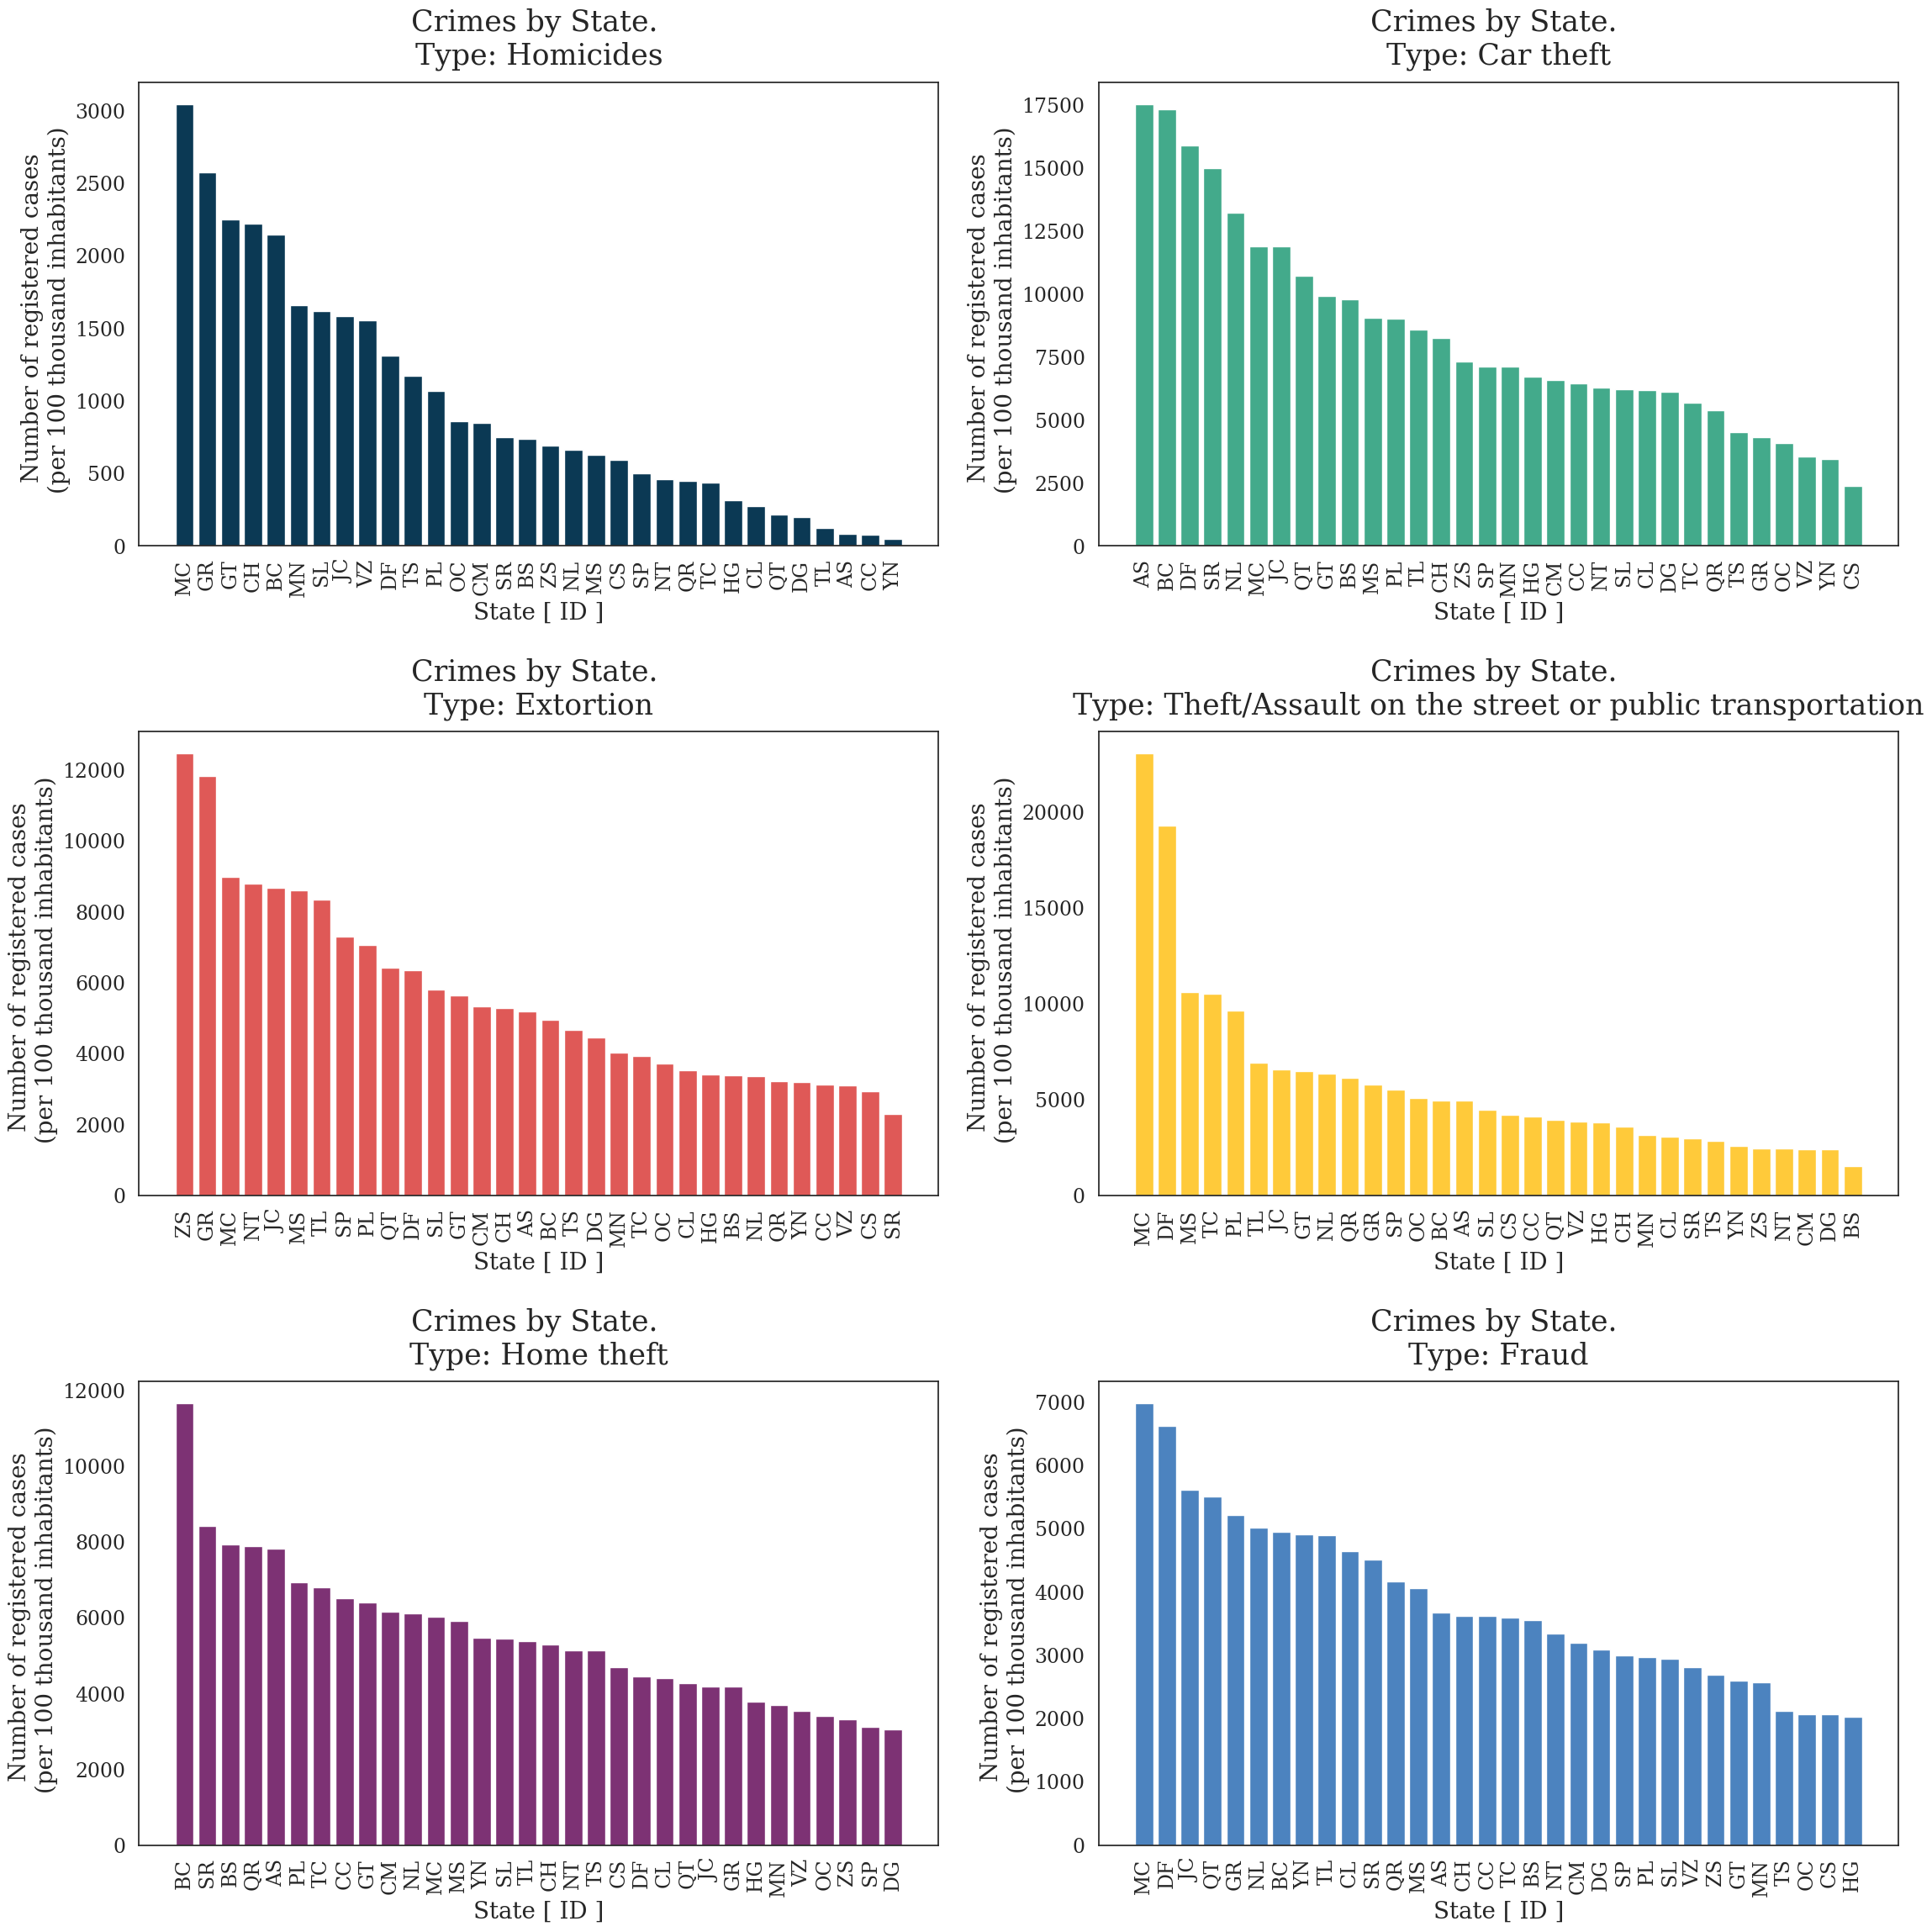

In [8]:
#colours of each bar chart
colours_barchart6 = ['#0B3954', '#43AA8B', '#DF5957', '#FFCA3A', '#7D3274', '#4C83BF']

#titles 
titles = ['Crimes by State. \nType: Homicides',
           'Crimes by State. \nType: Car theft', 'Crimes by State. \nType: Extortion',
           'Crimes by State. \nType: Theft/Assault on the street or public transportation', 
           'Crimes by State. \nType: Home theft', 'Crimes by State. \nType: Fraud',
          ]

#create a data frame without the 'POBLACION' and 'PP_URBANA' columns
df_barchart6 = df.drop( ['POPULATION','URBAN_PP'], axis = 'columns' )

#dropped 'POBLACION' and 'PP_URBANA' in order to have the crime variables
variables_barchart6 = df_barchart6.columns.values[3:]

#---------------------- PLOTTING THE BAR CHARTS ----------------------------------------------

#create a figure
plt.figure( figsize=(27,3),
           dpi = 100,
           facecolor=c_background
          )
plt.axes().set_facecolor( c_background )

#using a for loop we plot every subplot of information
for i in range(len(titles)):

    #sort values in descending order for each type of crime 
    df_barchart6 = df_barchart6.sort_values( by = variables_barchart6[i], ascending = False )

    #create a subplot
    plt.subplot( 3, 2, i+1 )

    #make the bar chart
    plt.bar( df_barchart6['ID'], df_barchart6[ variables_barchart6[i] ],
            color = colours_barchart6[i] #choose a colour from the list
           )
    
    #add title and labels on the axes
    plt.title( titles[i], size = 25, pad = 15 )
    plt.xlabel( 'State [ ID ]', size = 20 )
    plt.ylabel( 'Number of registered cases \n (per 100 thousand inhabitants)', size = 20 )
    plt.xticks( rotation = 90 )
    plt.tick_params( labelsize = 17 )

#adjust subplots
plt.subplots_adjust( top = 7, bottom= 0.01, 
                    hspace=0.4 )
plt.show()

### Correlation of the variables

For this analysis only the most important variables will be taken, these are:

1. **CAR_THEFT**
2. **STREET_TRANSPORT_THEFT**
3. **EXTORTION**
4. **HOMICIDES**

The correlation between these four variables will be shown below for a better perspective of the problem:

In [9]:
variables = np.array( [ 'HOMICIDES', 'CAR_THEFT', 'EXTORTION', 'STREET_TRANSPORT_THEFT' ] )

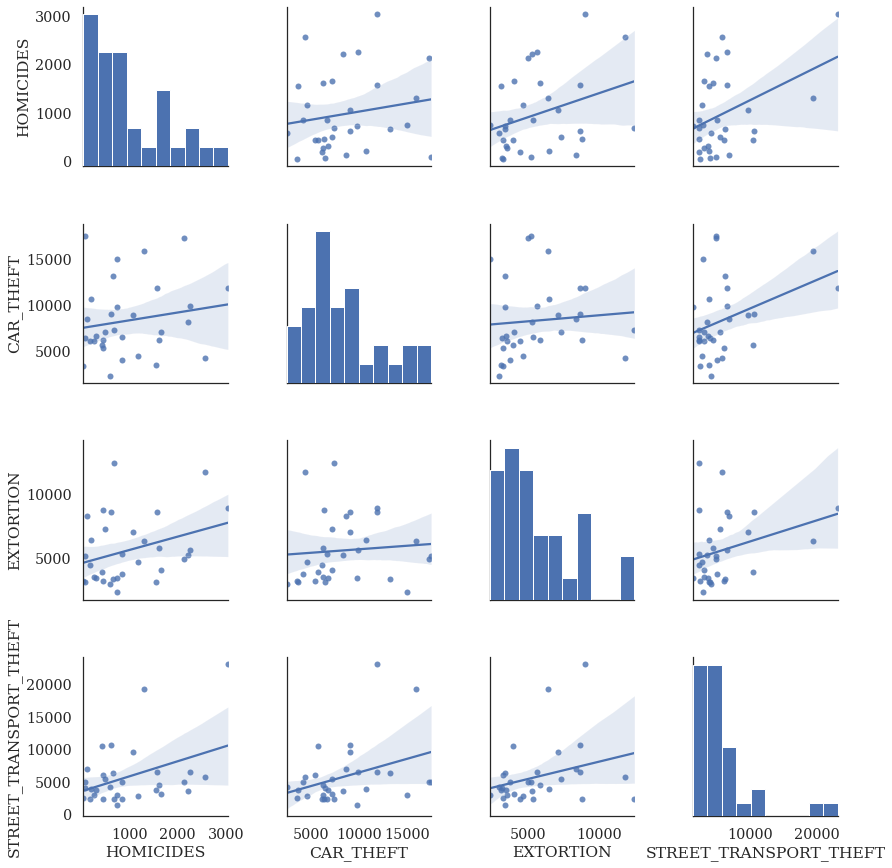

In [10]:
#relative size of the labels on the pairplot
sns.set( font_scale = 1.3, style = 'white' )
plt.rc('font', family='serif')

sns.pairplot( df[ variables ],
             kind = 'reg',
             height= 3.0, aspect=1.0,
            )
plt.show()

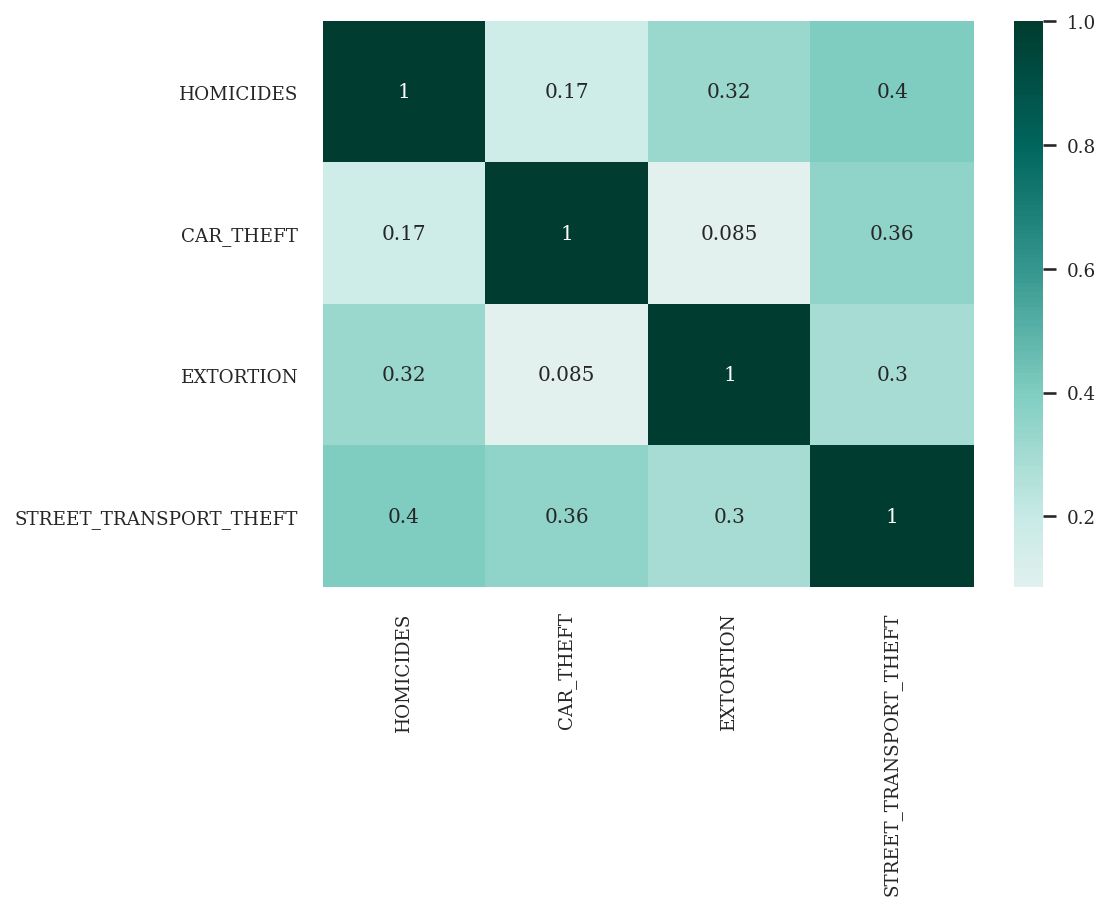

In [11]:
#create a figure to plot
plt.figure( dpi = 150,
           figsize=(7,5)
          )

#create a correlation matrix
corrMatrix = df[variables].corr().round(3)

#relative size of the labels on the heatmap
sns.set( font_scale= 0.8 )
plt.rc('font', family='serif')


#plot the heat map
sns.heatmap( corrMatrix, annot = True , cmap = 'BrBG', center=0 )

#rotate the x and y tiks
plt.xticks( rotation = 90 )
plt.yticks( rotation = 0 )

plt.show()

It is observed that the highest correlations are:

* **`HOMICIDES` - `STREET_TRANSPORT_THEFT`**
* **`CAR_THEFT` - `STREET_TRANSPORT_THEFT`**
* **`HOMICIDES` - `EXTORTION`**


## Data preprocessing: Standardization

An essential step for the Cluster Analysis is **standardization** . In this process, the variables' data are re-scale to lie under the same weighing; thus, the data's similarity is determined. Standardization is necessary when the variables have different scales.

One way to perform this task is to model the distributions of the variables as a **Normal Distribution** with mean $\mu$ and standard deviation $\sigma$. The following formula is used to model such distribution:

\begin{equation}
z = \frac{x_{i}-\mu}{\sigma}
\end{equation}

Where $x_i$ is the value of one of the variables' distribution.

In [12]:
print( 'Our variables are:\n', variables )

Our variables are:
 ['HOMICIDES' 'CAR_THEFT' 'EXTORTION' 'STREET_TRANSPORT_THEFT']


In [13]:
#Here we standardize a dataset along any axis. Center to the mean and component wise scale to unit variance.
from sklearn import preprocessing
df_standardized = preprocessing.scale( df[variables] )
df_standardized = pd.DataFrame( df_standardized )
df_standardized.head()

,0,1,2,3
0,-1.124993,2.305390,-0.162973,-0.182629
1,1.476716,2.255641,-0.249588,-0.181757
2,-0.295627,0.359652,-0.859776,-0.934411
3,-1.133829,-0.480554,-0.963092,-0.371936
4,-0.885146,-0.544624,-0.805399,-0.594355


## K-Means Algorithm and Cluster Analysis

In [14]:
#import the K-Means algorithm from sklearn
from sklearn.cluster import KMeans 

**What is it? (a summary)**

**K-Means Algorithm** seeks to find $K$ number of clusters in a data set. This clusters have to be aspart as the can be from each other and keep their elements as closely as possible.

![kmeans_example1](figures/k_means.jpg)

**The problem**

Cluster analysis is ideal to find patterns, client segmentation, and in our case, to find similitudes. However, the question is always the same: what is the $K$ numbers that makes the number of clusters optimal?

**The options**

There are two ways to find the optimal number of clusters:

* **The Elbow Method** : this approach plots the values of the **WCSS** ( _Within Clusters Summed Squares_ ) and the point where the value of the parameter falls most from the previous value is selected.
* **The Silhouette Method** : in this procedure, the **Silhouette Coefficient** is plotted, and the maximum value is selected

### Elbow Method

The **Elbow Method** is the most popular way to find the optimal number of clusters in the data set selected. This method employs the  _Within Cluster Summed Squares_ parameter or **WCSS** parameter, this number is obtained with each group's **centroid** locations.

*** Centroid** : Geometric point where the majority of the cluster's data is concentrated.

#### How does the Elbow Method Work ?

**Within Cluster Summed Squares (WCSS)** is a parameter that represents the square distance from each data point to the cluster's centroid where it belongs.

Different number of clusters give different _WCSS_ parameters.  If the _WCSS_ parameter associated with every possible cluster of the data set is plotted, it will be obtained something similar to:


![wcss_plot](figures/elbow_example.png)

The _WCSS_ parameter decays as the number of clusters increase. The difference of _WCSS_ 's decrease between clusters diminishes. What is the optimal number of clusters? When the decrease difference is not significant.

Looking at the image above, there is a significant difference when the number of clusters is 3; after that number, the difference between clusters is attenuated or not significant. In this example, **the optimal number of clusters is 3.**

This method is called **Elbow Method** because the point where the decrease of the _WCSS_ parameter starts to get less significant makes the graph looks like a semi-flexed arm, and the point that gives us the optimal number of clusters is the elbow.

![elbow_plot](figures/elbow_plot_example.png)
  


#### Application of the Elbow Method

In [15]:
#create a list for the wcss parameter
wcss = []

#test with 14 clusters
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 11)
    kmeans.fit(df_standardized)
    wcss.append(kmeans.inertia_)
wcss

[128.00000000000003,
 89.1888722702738,
 68.62582996676531,
 50.30552755177816,
 38.748959725688216,
 31.88544833378808,
 27.966131900839613,
 24.479239536801874,
 20.284309166267974,
 17.44276603462374,
 14.677573805938081,
 12.927782497397484,
 11.518580806684632,
 9.53248391640805]

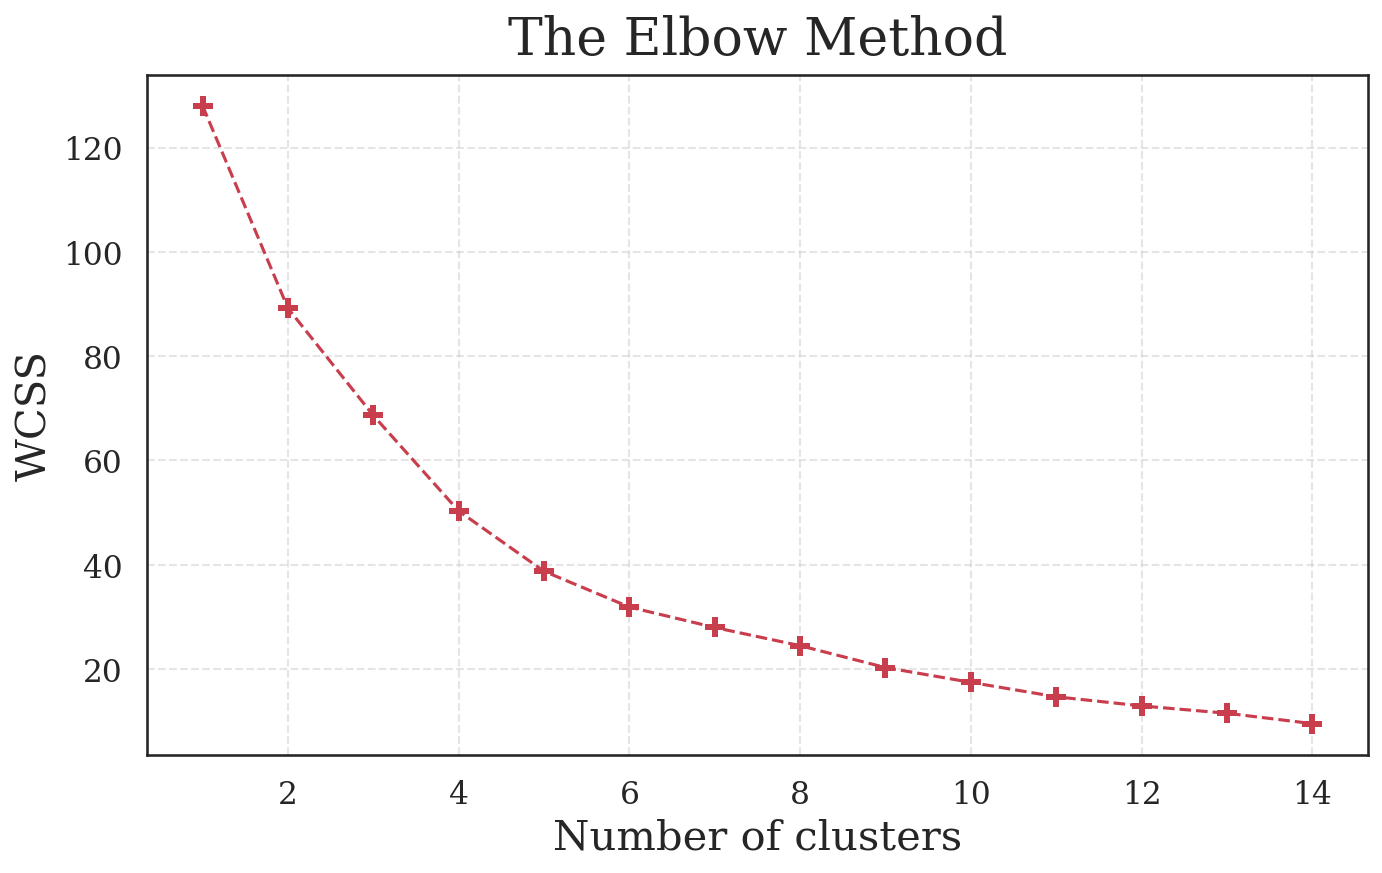

In [16]:
#matplotlib font type and seaborn style
sns.set( style = 'white' )
plt.rc('font', family='serif')

plt.figure( figsize=(10.5,6),
           dpi = 150,
           facecolor=c_background
          )
plt.axes().set_facecolor(c_background)

plt.plot(range(1, 15), wcss,
         linestyle = '--', linewidth = 1.5,
         marker = 'P', markersize = 10,
         color = '#C83E4D' ,
         label = 'The Elbow Method'
        )


plt.title('The Elbow Method', size = 25, pad = 10)
plt.xlabel('Number of clusters', size = 20)
plt.ylabel('WCSS', size = 20)
plt.tick_params( labelsize = 15 )

plt.grid( b = True, linestyle = 'dashed', alpha = 0.5 )

plt.show()

The optimal number of clusters is not not precise in this case.

### _Silhouette Method_

As observed, it is not always clear the optimal number of clusters using the Elbow Method; however, there is another option: **The Silhouette Method.**

#### What does the Silhouette Method do ?

In order to use the Silhouette Method, it is necessary to obtain the _silhouette score_ . This parameter indicates how appropriate the classification of a point is for the cluster in which it is located. The mathematical equation is:


\begin{equation}
    s(i) = \frac{b(i) - a(i)}{\mathrm{max}(a,b)}
\end{equation}

Where:
* $a(i)$  is the average distance from a point $i$ to all the points from the **same cluster** , also called **intracluster distance** .
* $b(i)$ is the average distance from the same point $i$ for all the **nearest cluster** points .
* $\text{max}(a,b)$ returns the greatest value (could be $a$ or $b$)


Each cluster corresponds to a silhouette score that is the average of all silhouette scores of all points in that same cluster, and the **silhouette score of the model** is the average of the clusters' values.


The ideal case is when $a$ is so small that we can say $a\to0$ and $b$ is so big that we can say $b\to\infty$ so the model's classification is excellent:

\begin{equation}
    s(i) = \frac{b(i)-a(i)}{\mathrm{max}(a,b)} = \frac{\infty - 0}{\mathrm{max}(0,\infty)} = 1
\end{equation}

this means that the worst case scenario is when $a>>b$ , and the model's classification is the worst:

\begin{equation}
    s(i) = \frac{b(i)-a(i)}{\mathrm{max}(a,b)} = \frac{0-\infty}{\mathrm{max}(\infty,0)} = -1
\end{equation}

In summary: The closer it gets to one the better. In this method we are trying to find the maximum value of the silhouette score to know the optimal number of clusters 

#### Application of the Silhouette Method

In [17]:
from sklearn.metrics import silhouette_samples, silhouette_score

The average value of the silhouette score for the `kmeans` model is:

In [18]:
silhouette_score(df_standardized,  kmeans.labels_)

0.22153395685895041

In [19]:
#create a list of K-Means models. Each element is a KMeans model with a specific number of clusters
kmeans2_sil= [KMeans(n_clusters=i, random_state=11, init='k-means++').fit(df_standardized) for i in range(1,15)]

#calculamos el silhouette score a cada modelo (de diferente número de clusters)
sil_values = [ silhouette_score(df_standardized, model.labels_, random_state=11)
                    for model in kmeans2_sil[1:]
                   ]
#save the silhouette coefficient in an array
sil_values = np.array( sil_values )
sil_values

array([0.31094147, 0.25692915, 0.29622513, 0.33172598, 0.31440817,
       0.27059918, 0.26444304, 0.26609203, 0.27996324, 0.23644891,
       0.20864574, 0.21003794, 0.22153396])

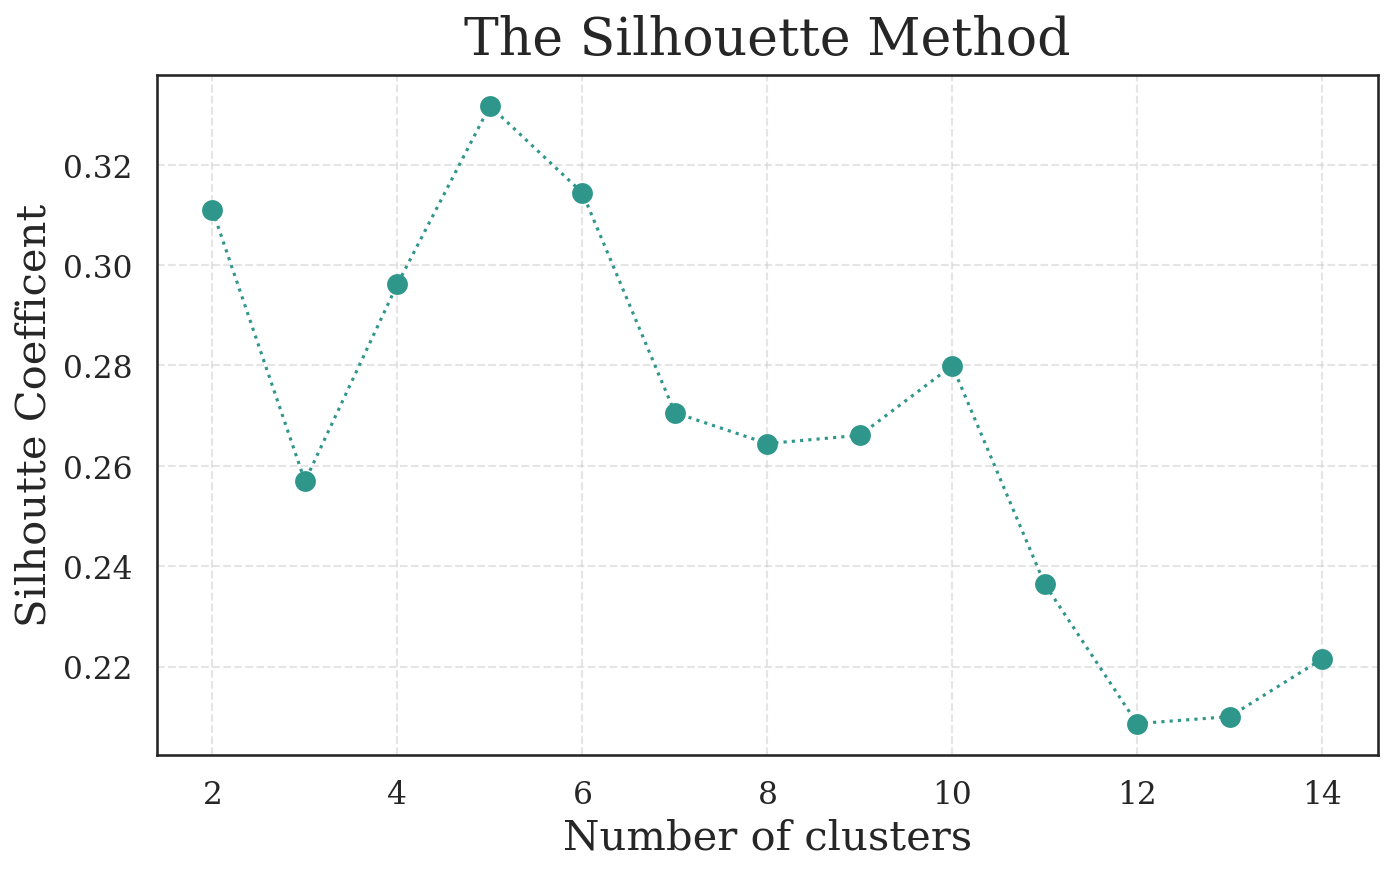

In [20]:
sns.set( style = 'white' )
plt.rc('font', family='serif')

plt.figure( figsize=(10.5,6),
           dpi = 150,
           facecolor=c_background
          )
plt.axes().set_facecolor = c_background

plt.plot(range(2, 15), sil_values,
         linestyle = ':', linewidth = 1.5,
         marker = 'o', markersize = 10,
         color = '#2F968B' ,
         label = 'The Silhoutte Method'
        )


plt.title('The Silhouette Method', size = 25, pad = 10)
plt.xlabel('Number of clusters', size = 20)
plt.ylabel('Silhoutte Coefficent', size = 20)
plt.tick_params( labelsize = 15 )

plt.grid( b = True, linestyle = 'dashed', alpha = 0.5 )

plt.show()

In [21]:
print( 'Max. Silhouette Score:', sil_values[ np.argmax(sil_values) ] )
print( 'Optimal number of cluters:', np.argmax(sil_values) + 1 + 1 )

Max. Silhouette Score: 0.3317259818144891
Optimal number of cluters: 5


### Complementation: The Elbow Method + The Silhouette Method

The **Elbow Method** is more of a decision rule, while the **Silhouette** is a metric used for validation while *clustering*. Thus, it can be used in combination with the **Elbow Method**.
Therefore, the **Elbow Method** and the **Silhouette Method** are not alternatives to each other for finding the *optimal K*. Rather they are tools to be used together for a more confident decision $^{5}$ . 

Below it is possible to observe the combination of both methods in the crime problem in Mexico.


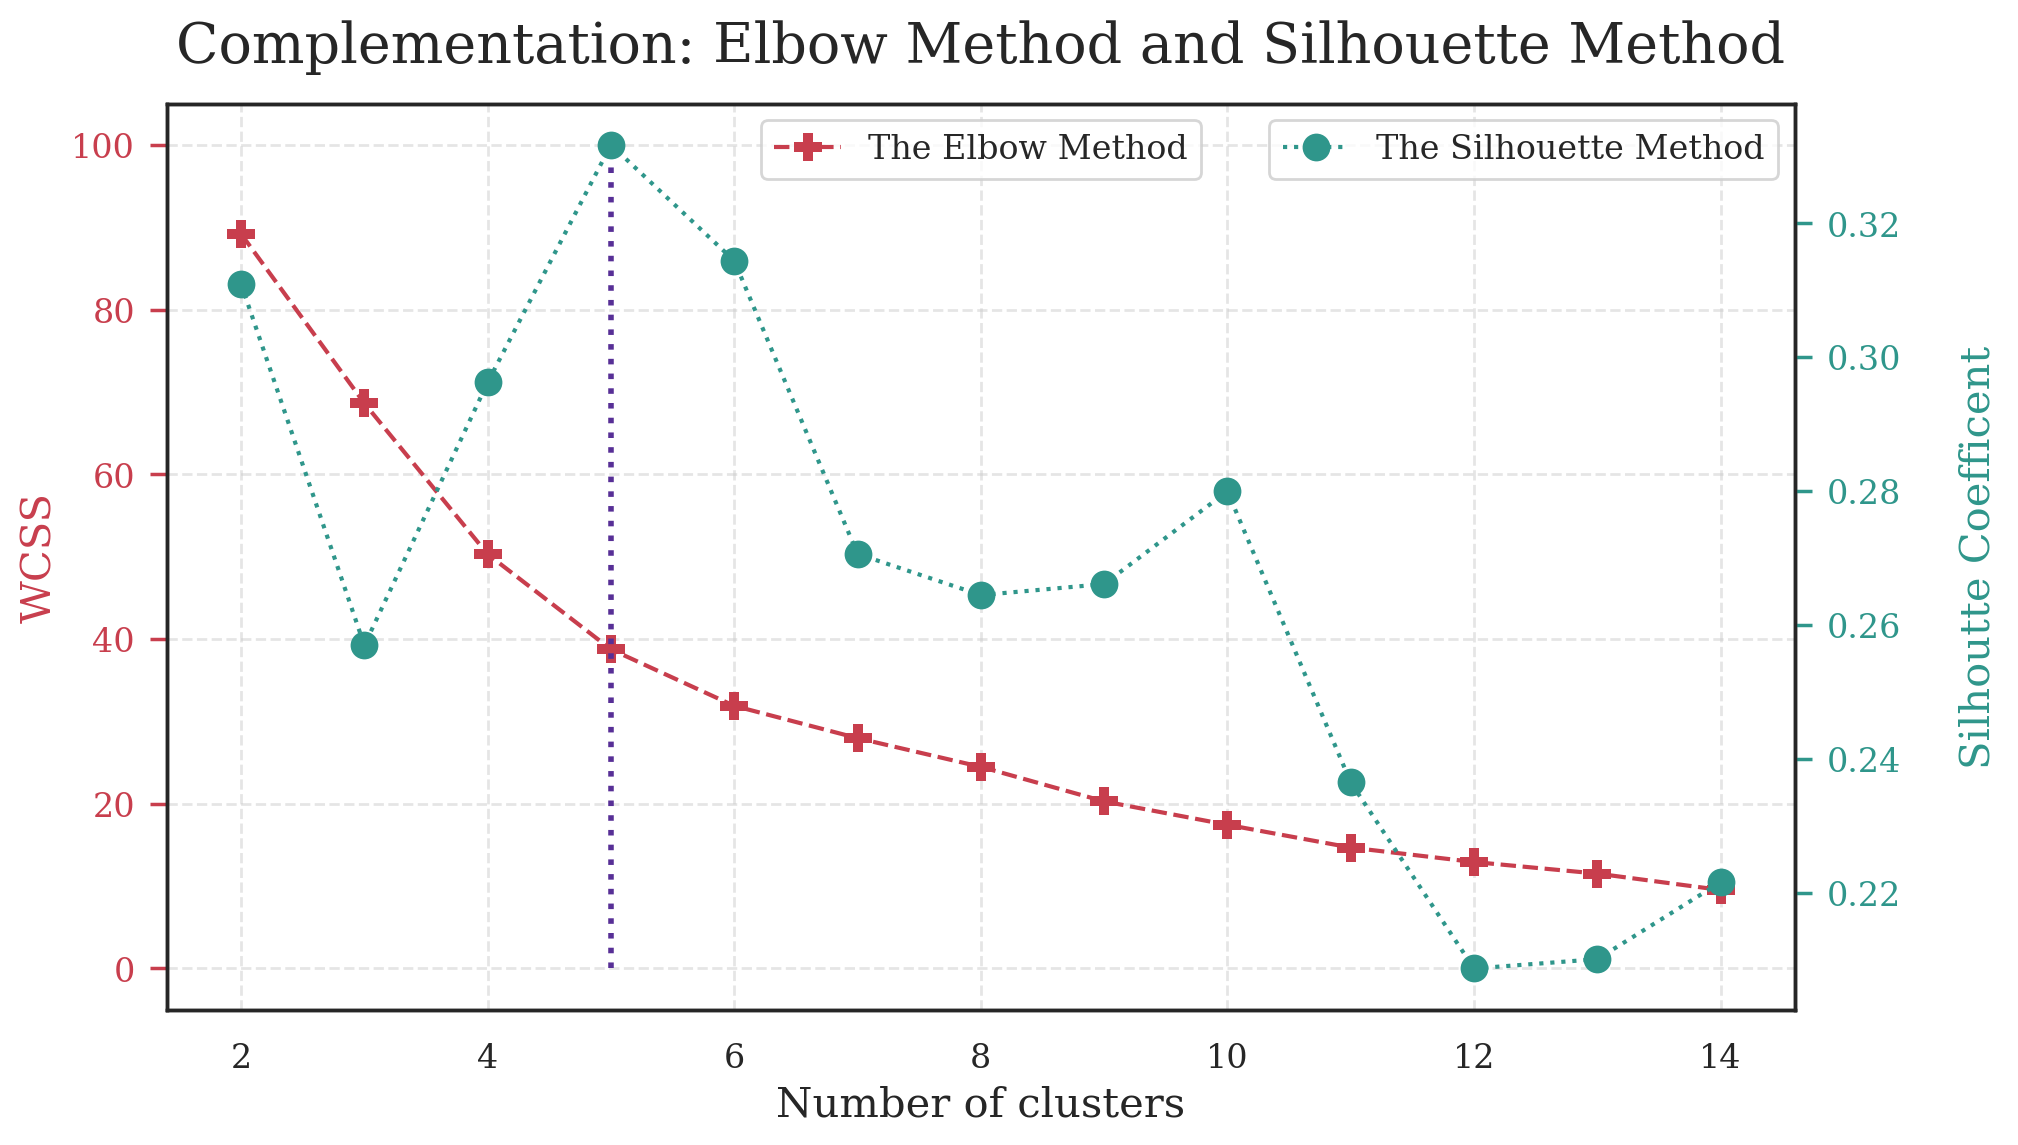

In [22]:
sns.set( style = 'white' )
plt.rc('font', family='serif')

fig , ax1 = plt.subplots( figsize = (10.5,6), 
                         facecolor = c_background,
                         dpi = 200 )

ax1.set_title('Complementation: Elbow Method and Silhouette Method', size = 20, pad = 15 )
ax1.set_facecolor(c_background)

#--------------- WCSS -----------------
ax1.plot( range(2,15), wcss[1:],
         linestyle = '--', linewidth = 1.5,
         marker = 'P', markersize = 10,
         color = '#C83E4D' ,
         label = 'The Elbow Method'
        )
#----------- optimal number of clusters -----------------
ax1.plot( [5,5], [0,100],
         linestyle = ':', linewidth = 2,
         color = '#572F96' ,
        )

ax1.set_xlabel( 'Number of clusters', size = 15 )
ax1.set_ylabel('WCSS', size = 15 )
ax1.tick_params( axis = 'x', labelsize = 12 )
ax1.tick_params( axis = 'y', labelsize = 12, colors = '#C83E4D' )
ax1.yaxis.label.set_color( '#C83E4D' )
plt.legend(loc='upper center', prop = {'size':12})


# ------------- silhoutte coeff -------------
ax2 = ax1.twinx()
ax2.plot( range(2,15), sil_values,
         linestyle = ':', linewidth = 1.5,
         marker = 'o', markersize = 10,
         color = '#2F968B' ,
         label = 'The Silhouette Method'
        )

ax2.set_ylabel( '\nSilhoutte Coefficent', size = 15 )
ax2.tick_params( axis = 'y', labelsize = 12, colors = '#2F968B' )
ax2.yaxis.label.set_color( '#2F968B' )
plt.legend(loc=0, prop = {'size':12})


ax1.grid( b = True, linestyle = 'dashed', alpha = 0.5 )

plt.show()


## Clustering  $\left( n_{\text{clusters} } = 5 \right)$

In this case it can be seen that the optimal number of _clusters_ is  $n_{\text{clusters} } = 5 $ and it is possible to apply it in the **_K-Means_ algorithm** to obtain the separation of the data into _clusters_ 

In [23]:
#Use of n_clusters = 5
kmeans = KMeans( n_clusters=5, init='k-means++', random_state=11 )

#train and prediction on our normalized data
predicted_y = kmeans.fit_predict( df_standardized )

#numbers of cluster goes from 0 to 4, we're adding +1 to the array
predicted_y = predicted_y + 1 

predicted_y

array([1, 1, 3, 3, 3, 3, 3, 2, 4, 3, 2, 2, 3, 5, 4, 2, 5, 5, 1, 3, 5, 5,
       3, 5, 2, 1, 3, 3, 5, 3, 3, 5])

Now those values will be added to a new column of **df** called **CLUSTER**

In [24]:
df['CLUSTER'] = predicted_y
df[ ['CLUSTER', 'STATE'] ].head()

,CLUSTER,STATE
0,1,AGUASCALIENTES
1,1,BAJACALIFORNIA
2,3,BAJACALIFORNIASUR
3,3,CAMPECHE
4,3,COAHUILADEZARAGOZA


## Analysis of the output

### Distribution of the variables

The following graph shows the correlation of each of the selected variables and each of the _clusters_ in colour.

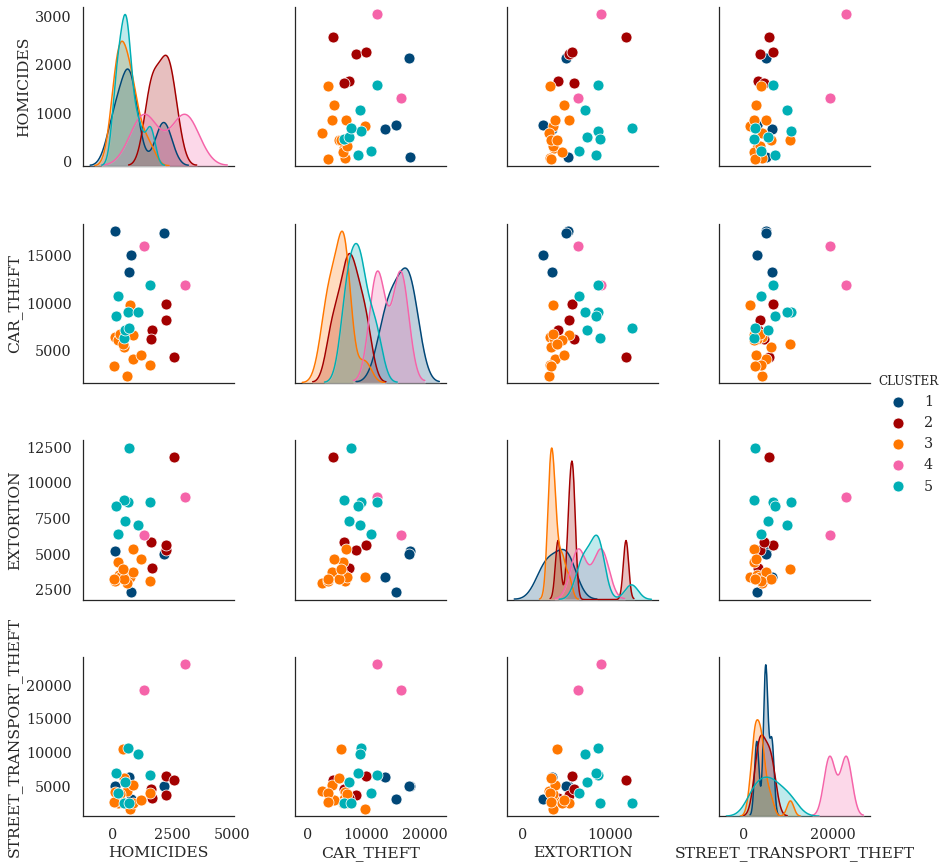

In [25]:
#the new variables for the pairplot
variables_cluster = np.append( variables, 'CLUSTER' )

#Color palette for the clusters
colours_cluster = ['#004777', '#A30000', '#FF7700',
                   '#F564A9', '#00AFB5']

#setting plot config
sns.set( font_scale = 1.3, style = 'white' )
plt.rc('font', family='serif')


sns.pairplot( df[variables_cluster], 
             hue='CLUSTER', 
             palette=colours_cluster, 
             height=3, aspect=1,
             plot_kws= dict(s=120),
             corner = False,
            )
plt.show()

### Correlation of the variables ( `'HOMICIDES'`, `'CAR_THEFT'`, `'STREET_TRANSPORT_THEFT'` )

The variables with the highest correlation (**HOMICIDES, CAR_THEFT and STREET_TRANSPORT_THEFT**) are taken and plotted together, and  it is possible to appreciate much better the way in which the _clusters_ are separated.

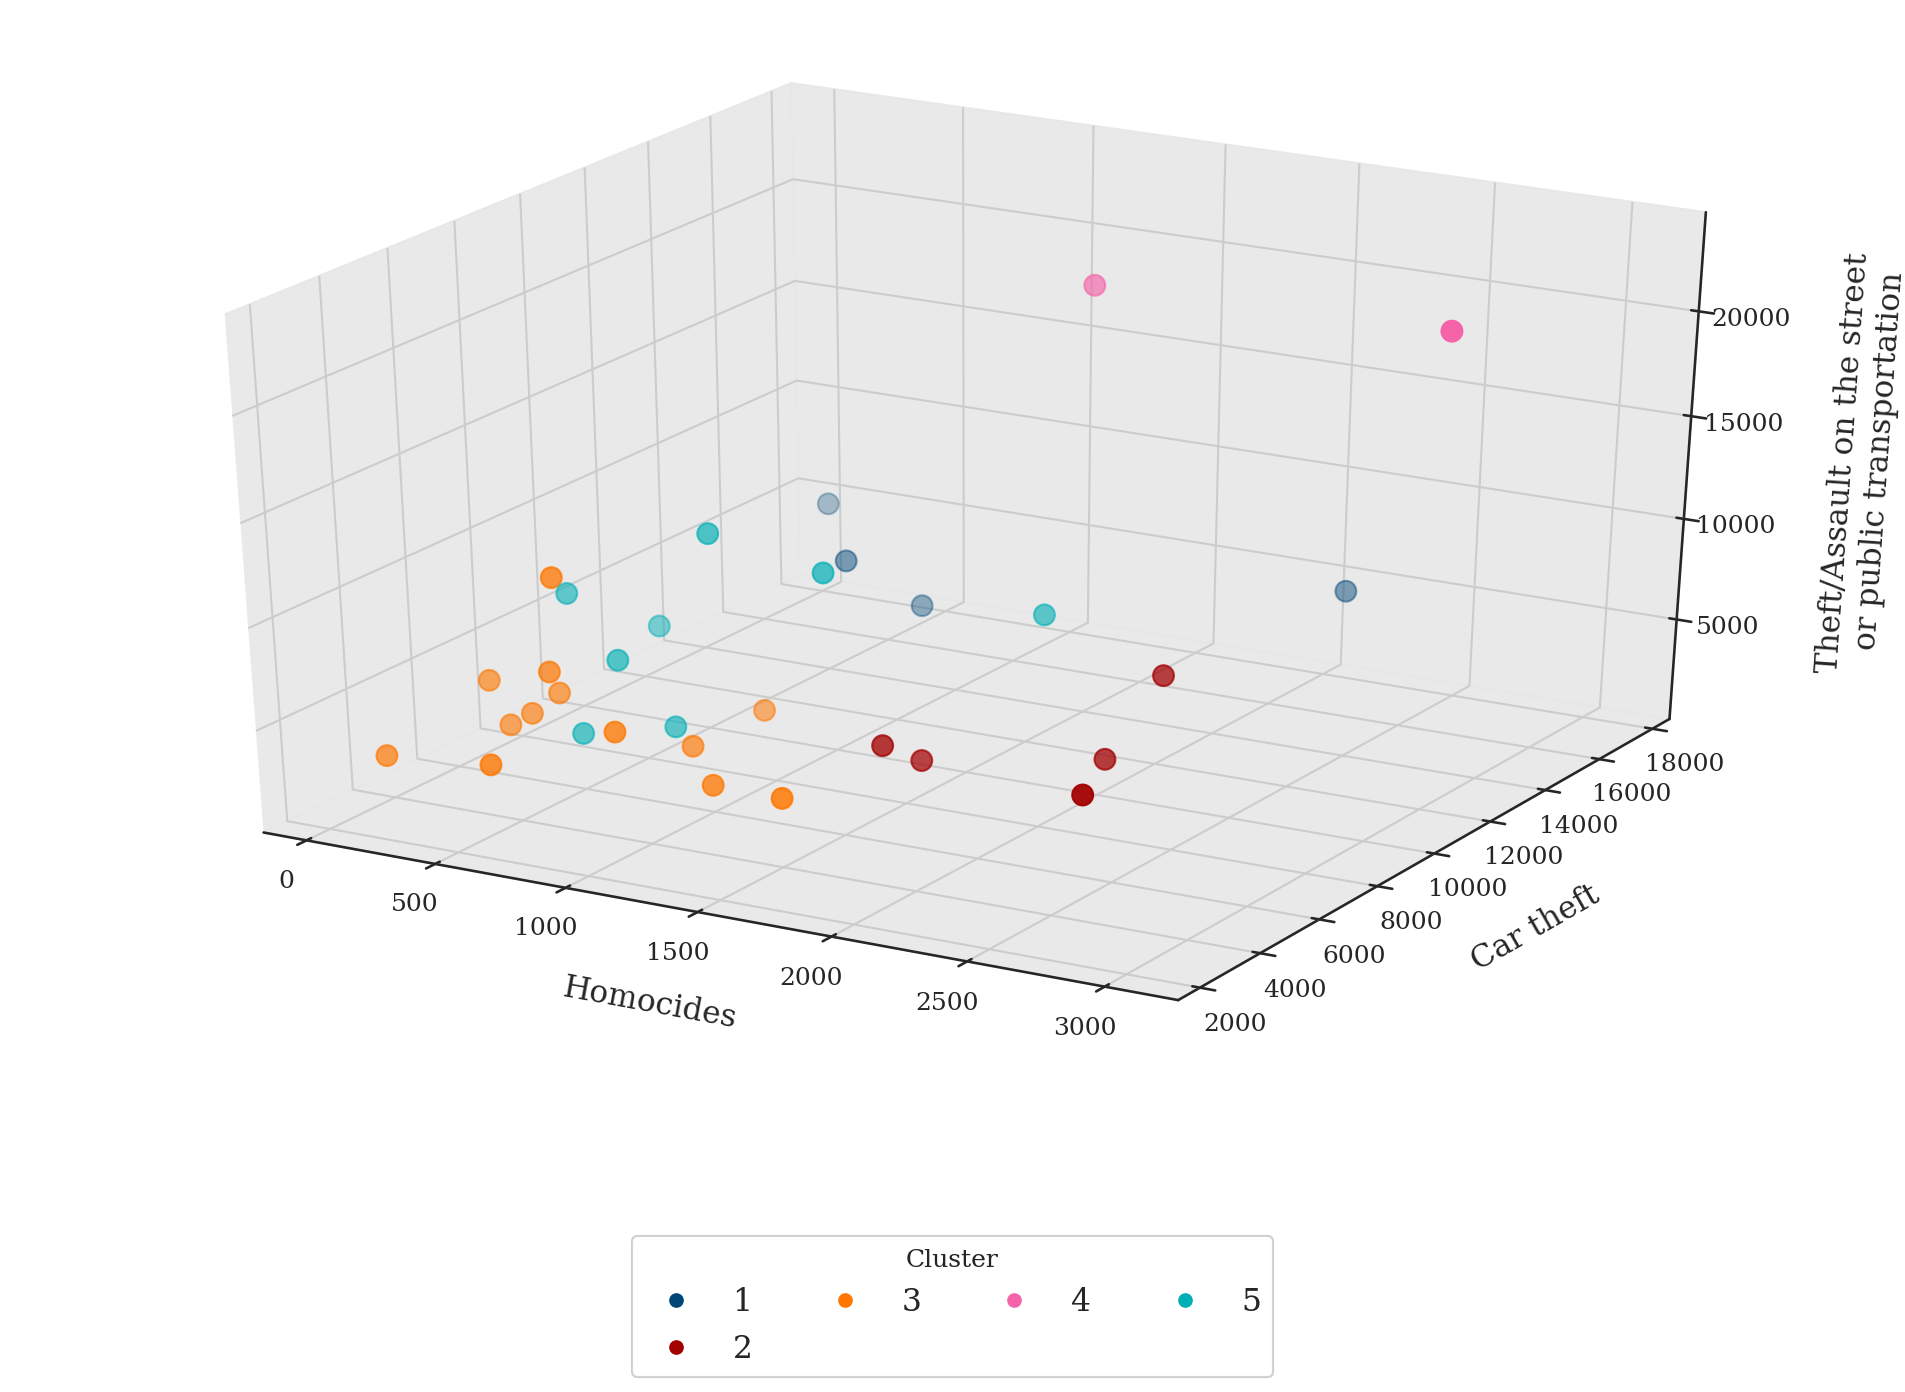

In [26]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors

sns.set( style = 'white' )
plt.rc('font', family='serif')

fig = plt.figure( figsize=(12.5, 7), dpi = 150 )
ax = Axes3D(fig)
ax.set_facecolor( c_background )
ax.w_xaxis.set_pane_color( rgba_planes )
ax.w_yaxis.set_pane_color( rgba_planes )
ax.w_zaxis.set_pane_color( rgba_planes )

x = df['HOMICIDES']
y = df['CAR_THEFT']
z = df['STREET_TRANSPORT_THEFT']
colours = df['CLUSTER']

cmap_clusters = matplotlib.colors.ListedColormap(colours_cluster)

g=ax.scatter(x, y, z, s=100,  c =  colours  , cmap=cmap_clusters  )


#label on axes
ax.set_xlabel('Homocides',
             labelpad = 20,
             size = 15,
             )
ax.set_ylabel('Car theft',
             labelpad = 20,
             size = 15,
             )
ax.set_zlabel('Theft/Assault on the street \nor public transportation',
             labelpad = 25,
             size = 15,
             )

#size of the axes
ax.tick_params( axis = 'x', labelsize = 12 )
ax.tick_params( axis = 'y', labelsize = 12 )
ax.tick_params( axis = 'z', labelsize = 12 )

legend = ax.legend(*g.legend_elements(), loc="lower center", prop = {'size':15},title="Cluster",
                   borderaxespad=-10, ncol=4)
ax.add_artist(legend)
ax.grid(b = True)

plt.show()

### Division of Mexican states

The geographical location of each _cluster_ is observed through a map created in the library **folium** $^{6}$, to identify the states by their corresponding *cluster colour* assigned by the **_K-Means_ algorithm**.


In [27]:
df_dict = df.set_index( 'ID' )['CLUSTER']

states_geo = 'data/states_mx.json'

#use folium to create map
import folium
map_mex = folium.Map( location = [24,-102], zoom_start = 4.5 )

#colour a state according to its cluster
def my_color_function(feature):
    if df_dict[feature['id']] == 1:
        return colours_cluster[0]
    elif df_dict[feature['id']] == 2:
        return colours_cluster[1]
    elif df_dict[feature['id']] == 3:
        return colours_cluster[2]
    elif df_dict[feature['id']] == 4:
        return colours_cluster[3]
    elif df_dict[feature['id']] == 5:
        return colours_cluster[4]

In [28]:
for i in range(4):
    folium.GeoJson(
        states_geo,
        style_function=lambda feature: {
            'fillColor': my_color_function(feature),
            'color' : 'black',
            'fill_opacity' : 10.1,
            'weight' : 0.3,
            }
        ).add_to(map_mex)

map_mex

## Discussion

![final_map](figures/map_mex.PNG)

It is possible to notice that there is a geographical relationship in the way in which they were grouped, so here are some comments regarding the division of the _clusters_ and the states they cover:

* **_Cluster 1_**:
    * **States:** Aguascalientes, Baja California, Nuevo León and Sonora
    * **Comment:** These four states are located in the north of Mexico, and their main characteristic is to have high rates of _car theft_ .

* **_Cluster 2_**:
    * **States:** Chihuahua, Guanajuato, Guerrero, Michoacán and Sinaloa
    * **Comment:** This _cluster_ has the characteristic of having the highest _homicide_ rates. The states that belong to the _cluster_ are located in the North and West of Mexico.

* **_Cluster 3_**:
    * **States:** Baja California Sur, Campeche, Coahuila, Colima, Chiapas, Durango, Hidalgo, Oaxaca, Quinatana Roo, Tabasco, Tamaulipas, Veracruz and Yucatán.
    * **Comment:** This _cluster_ contains the highest number of states, and in general they have the lowest indices of the four parameters that are being considered. Most of the states of this _cluster_ are found in the Southeast of Mexico.

* **_Cluster 4_**:
    * **States:** Mexico City and State of Mexico
    * **Comment:** These two entities behave very similarly in their parameters and the algorithm classifies them in a single cluster and they have the characteristic of having a high score of _theft on the street and public transport_.

* **_Cluster 5_**:
    * **States:** Jalisco, Morelos, Nayarit, Puebla, Querétaro, San Luis Potosí, Tlaxcala and Zacatecas
    * **Comment:** In this _cluster_ the states are geographically very close, they are located in the western region of Mexico and have the characteristic of having high rates of _extortion_.


## Conclusions

Unsupervised learning can help show patterns or similarities that are not easily observed, especially when many variables are involved.

When the **_K-Means_ algorithm** is used to perform *cluster analysis*, the **Elbow method** is a great tool to choose several clusters, although sometimes using this method, the optimal number of clusters is not so precise. The **Silhouette Method** is then used to find the maximum value (either visually or with software support). As mentioned earlier both methods are not alternatives to each other for finding the *optimal K*, they are tools to be used together for a more confident decision.  

With this exercise, it was observed that Machine Learning tools tools could be applied to studies from other areas such as the *Social Sciences*.

# Final Remarks 

These results obtained have some similarity with the results published in the document **Mexico Peace Index 2018** found on the **IMCO** ( _Instituto Mexicano para la Competitividad A.C._ )  published on April 13, 2018 $^{1}$ $^{7}$.

# References

$^{1}$ IEP Mexico.  *El Índice de Paz México*. https://www.indicedepazmexico.org/la-paz-en-mexico


$^{2}$ INGEI. *Encuesta Nacional de Victimización y Percepción sobre Seguridad Pública (ENVIPE) 2018*. https://www.inegi.org.mx/programas/envipe/2018/default.html#Tabulados

$^{3}$ El Univseral. *Rompe 2017 récord en asesinatos, con 31 mil 174*. https://www.eluniversal.com.mx/nacion/seguridad/inegi-homicidios-en-mexico-registran-record-en-2017

$^{4}$  SEMARNAT, *Población rural y urbana* ,
https://apps1.semarnat.gob.mx:8443/dgeia/compendio_2016/archivos/04_demografia/D1_DEMOGRAF01_02_D.pdf

$^{5}$  *How to Determine the Optimal K for K-Means?*.  https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb#:~:text=The%20Elbow%20Method%20is%20more,for%20finding%20the%20optimal%20K.

$^{6}$ https://python-visualization.github.io/folium/

$^{7}$ Institute for Economics and Peace, *El Índice de Paz México 2018*, http://visionofhumanity.org/app/uploads/2018/04/Mexico-Peace-Index-2018-Spanish.pdf *texto en cursiva*

